#### Classification using deep learning algorithm


##### Dataset used : "Car_Insurance_Claim"


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report, confusion_matrix


In [52]:
insurance_data=pd.read_excel('Car_Insurance_Claim.xlsx')
insurance_data.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,Yes,after 2015,0,1,10238,12000.0,sedan,0,0,0,0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,No,before 2015,0,0,10238,16000.0,sedan,0,0,0,1
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,Yes,before 2015,0,0,10238,11000.0,sedan,0,0,0,0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,Yes,before 2015,0,1,32765,11000.0,sedan,0,0,0,0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,Yes,before 2015,0,0,32765,12000.0,sedan,2,0,1,1


In [53]:
df=insurance_data.copy()

In [54]:
df.drop(['ID', 'POSTAL_CODE'], axis=1, inplace=True)

In [55]:
df.describe()

,CREDIT_SCORE,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,9018.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,0.515813,0.498200,0.688800,11697.003207,1.482900,0.23920,1.056300,0.313300
std,0.137688,0.500022,0.463008,2818.434528,2.241966,0.55499,1.652454,0.463858
min,0.053358,0.000000,0.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,0.417191,0.000000,0.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,0.525033,0.000000,1.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,0.618312,1.000000,1.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,0.960819,1.000000,1.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


In [56]:
df.isna().sum()

AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

In [57]:
credit_na=df['CREDIT_SCORE'].isna().sum()/len(df)*100
mileage_na=df['ANNUAL_MILEAGE'].isna().sum()/len(df)*100
print(credit_na,'% of missing values in CREDIT_SCORE column')
print(round(mileage_na,2),'% of missing values in MILEAGE column')

9.82 % of missing values in CREDIT_SCORE column
9.57 % of missing values in MILEAGE column


In [58]:
df.fillna(df['CREDIT_SCORE'].mean(),inplace=True)

In [59]:
df.fillna(df['ANNUAL_MILEAGE'].median(),inplace=True)

In [60]:
df.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65+,female,majority,0-9y,high school,upper class,0.629027,Yes,after 2015,0,1,12000.0,sedan,0,0,0,0
1,16-25,male,majority,0-9y,none,poverty,0.357757,No,before 2015,0,0,16000.0,sedan,0,0,0,1
2,16-25,female,majority,0-9y,high school,working class,0.493146,Yes,before 2015,0,0,11000.0,sedan,0,0,0,0
3,16-25,male,majority,0-9y,university,working class,0.206013,Yes,before 2015,0,1,11000.0,sedan,0,0,0,0
4,26-39,male,majority,10-19y,none,working class,0.388366,Yes,before 2015,0,0,12000.0,sedan,2,0,1,1


In [61]:
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'VEHICLE_TYPE'],
      dtype='object')


In [62]:
df.drop(['RACE','EDUCATION','INCOME','MARRIED','CHILDREN','SPEEDING_VIOLATIONS','DUIS'], axis=1, inplace=True)

In [63]:
df.head()

,AGE,GENDER,DRIVING_EXPERIENCE,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,ANNUAL_MILEAGE,VEHICLE_TYPE,PAST_ACCIDENTS,OUTCOME
0,65+,female,0-9y,0.629027,Yes,after 2015,12000.0,sedan,0,0
1,16-25,male,0-9y,0.357757,No,before 2015,16000.0,sedan,0,1
2,16-25,female,0-9y,0.493146,Yes,before 2015,11000.0,sedan,0,0
3,16-25,male,0-9y,0.206013,Yes,before 2015,11000.0,sedan,0,0
4,26-39,male,10-19y,0.388366,Yes,before 2015,12000.0,sedan,1,1


### Visualization

C:\Users\K. Deepak\AppData\Local\Temp\ipykernel_10652\3388277337.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="OUTCOME",data=df, palette=sns.xkcd_palette(["azure", "light red"]))


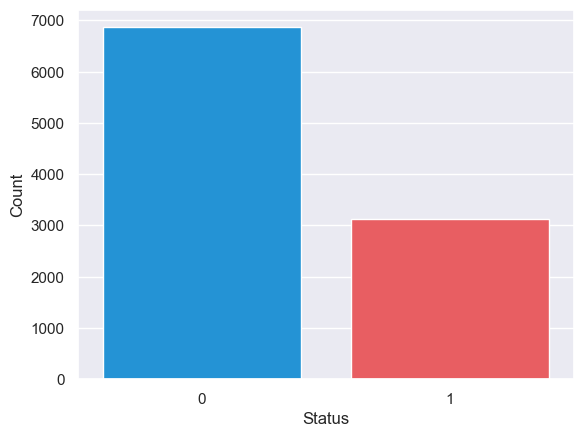

In [64]:
sns.set(style="darkgrid")
ax = sns.countplot(x="OUTCOME",data=df, palette=sns.xkcd_palette(["azure", "light red"]))
plt.xlabel('Status')
plt.ylabel('Count')

plt.show()

In [65]:
df['OUTCOME'].value_counts()

OUTCOME
0    6867
1    3133
Name: count, dtype: int64

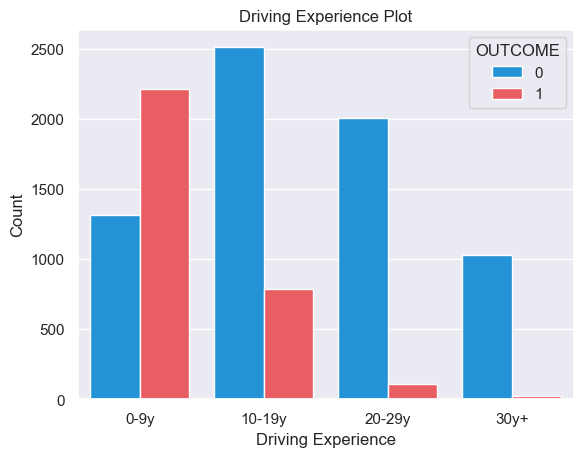

In [66]:
sns.countplot(x='DRIVING_EXPERIENCE', data=df, hue='OUTCOME', palette=sns.xkcd_palette(["azure", "light red"]))
plt.title("Driving Experience Plot")
plt.xlabel('Driving Experience')
plt.ylabel('Count')

plt.show()

Inference: As driving experience increases, the claim rate decreases, hence these two are negatively correlated.

In [67]:
df.head()

,AGE,GENDER,DRIVING_EXPERIENCE,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,ANNUAL_MILEAGE,VEHICLE_TYPE,PAST_ACCIDENTS,OUTCOME
0,65+,female,0-9y,0.629027,Yes,after 2015,12000.0,sedan,0,0
1,16-25,male,0-9y,0.357757,No,before 2015,16000.0,sedan,0,1
2,16-25,female,0-9y,0.493146,Yes,before 2015,11000.0,sedan,0,0
3,16-25,male,0-9y,0.206013,Yes,before 2015,11000.0,sedan,0,0
4,26-39,male,10-19y,0.388366,Yes,before 2015,12000.0,sedan,1,1


In [68]:
label_enc_gen=LabelEncoder()
df['GENDER']=label_enc_gen.fit_transform(df['GENDER'])
label_enc_own=LabelEncoder()
df['VEHICLE_OWNERSHIP']=label_enc_own.fit_transform(df['VEHICLE_OWNERSHIP'])
label_enc_year=LabelEncoder()
df['VEHICLE_YEAR']=label_enc_year.fit_transform(df['VEHICLE_YEAR'])
label_enc_type=LabelEncoder()
df['VEHICLE_TYPE']=label_enc_type.fit_transform(df['VEHICLE_TYPE'])
df.head()

,AGE,GENDER,DRIVING_EXPERIENCE,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,ANNUAL_MILEAGE,VEHICLE_TYPE,PAST_ACCIDENTS,OUTCOME
0,65+,0,0-9y,0.629027,1,0,12000.0,0,0,0
1,16-25,1,0-9y,0.357757,0,1,16000.0,0,0,1
2,16-25,0,0-9y,0.493146,1,1,11000.0,0,0,0
3,16-25,1,0-9y,0.206013,1,1,11000.0,0,0,0
4,26-39,1,10-19y,0.388366,1,1,12000.0,0,1,1


In [69]:
one_en_dr=OneHotEncoder()



In [70]:
onehot_encoded = one_en_dr.fit_transform(df[['DRIVING_EXPERIENCE']])
onehot_encoded_df = pd.DataFrame(onehot_encoded.toarray(), columns=one_en_dr.get_feature_names_out(['DRIVING_EXPERIENCE']))

In [71]:
df=pd.concat([df,onehot_encoded_df],axis=1)
df.drop(['DRIVING_EXPERIENCE'],axis=1,inplace=True)

In [72]:
df.head()

,AGE,GENDER,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,ANNUAL_MILEAGE,VEHICLE_TYPE,PAST_ACCIDENTS,OUTCOME,DRIVING_EXPERIENCE_0-9y,DRIVING_EXPERIENCE_10-19y,DRIVING_EXPERIENCE_20-29y,DRIVING_EXPERIENCE_30y+
0,65+,0,0.629027,1,0,12000.0,0,0,0,1.0,0.0,0.0,0.0
1,16-25,1,0.357757,0,1,16000.0,0,0,1,1.0,0.0,0.0,0.0
2,16-25,0,0.493146,1,1,11000.0,0,0,0,1.0,0.0,0.0,0.0
3,16-25,1,0.206013,1,1,11000.0,0,0,0,1.0,0.0,0.0,0.0
4,26-39,1,0.388366,1,1,12000.0,0,1,1,0.0,1.0,0.0,0.0


In [73]:
one_en_age=OneHotEncoder()

In [74]:
onehot_encoded1 = one_en_age.fit_transform(df[['AGE']])
onehot_encoded_df1 = pd.DataFrame(onehot_encoded1.toarray(), columns=one_en_age.get_feature_names_out(['AGE']))

In [75]:
onehot_encoded_df1.head()

,AGE_16-25,AGE_26-39,AGE_40-64,AGE_65+
0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0


In [76]:
df=pd.concat([df,onehot_encoded_df1],axis=1)
df.drop(['AGE'],axis=1,inplace=True)

In [77]:
outcome = df.pop('OUTCOME')
df['OUTCOME'] = outcome
df.head()

,GENDER,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,ANNUAL_MILEAGE,VEHICLE_TYPE,PAST_ACCIDENTS,DRIVING_EXPERIENCE_0-9y,DRIVING_EXPERIENCE_10-19y,DRIVING_EXPERIENCE_20-29y,DRIVING_EXPERIENCE_30y+,AGE_16-25,AGE_26-39,AGE_40-64,AGE_65+,OUTCOME
0,0,0.629027,1,0,12000.0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,1,0.357757,0,1,16000.0,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
2,0,0.493146,1,1,11000.0,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
3,1,0.206013,1,1,11000.0,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
4,1,0.388366,1,1,12000.0,0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1


In [78]:
with open('label_enc_gen.pkl','wb') as file:
    pickle.dump(label_enc_gen,file)

with open('label_enc_year.pkl','wb') as file:
    pickle.dump(label_enc_year,file)

with open('label_enc_type.pkl','wb') as file:
    pickle.dump(label_enc_type,file)

with open('label_enc_own.pkl','wb') as file:        
    pickle.dump(label_enc_own,file)

with open('one_en_dr.pkl','wb') as file:
    pickle.dump(one_en_dr,file)

with open('one_en_age.pkl','wb') as file:
    pickle.dump(one_en_age,file)

#### Model Building

In [79]:
X=df.drop(['OUTCOME'],axis=1)
y=df['OUTCOME']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
X_train.head()

,GENDER,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,ANNUAL_MILEAGE,VEHICLE_TYPE,PAST_ACCIDENTS,DRIVING_EXPERIENCE_0-9y,DRIVING_EXPERIENCE_10-19y,DRIVING_EXPERIENCE_20-29y,DRIVING_EXPERIENCE_30y+,AGE_16-25,AGE_26-39,AGE_40-64,AGE_65+
9254,0,0.545417,1,0,8000.0,0,6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1561,1,0.361876,0,1,9000.0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1670,0,0.535840,1,1,12000.0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6087,0,0.612545,1,0,9000.0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6669,1,0.474268,1,1,13000.0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [82]:
scaler=StandardScaler()
x_train=scaler.fit_transform(X_train)
x_test=scaler.transform(X_test)

In [83]:
x_train

array([[-1.00225254,  0.23160058,  0.66148028, ..., -0.66245673,
        -0.64104192,  1.9899001 ],
       [ 0.99775253, -1.17786385, -1.51176088, ...,  1.50953255,
        -0.64104192, -0.50253779],
       [-1.00225254,  0.15805825,  0.66148028, ...,  1.50953255,
        -0.64104192, -0.50253779],
       ...,
       [-1.00225254,  0.85049542,  0.66148028, ..., -0.66245673,
        -0.64104192,  1.9899001 ],
       [ 0.99775253,  1.7326469 ,  0.66148028, ..., -0.66245673,
         1.55996038, -0.50253779],
       [ 0.99775253, -1.32206324, -1.51176088, ..., -0.66245673,
        -0.64104192, -0.50253779]])

In [84]:
with open('scaling.pkl','wb') as file:
    pickle.dump(scaler,file)

In [85]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping 

In [86]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

f:\BV-25\Projects\DL-classification\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [87]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,417 (48.50 KB)

 Trainable params: 12,417 (48.50 KB)

 Non-trainable params: 0 (0.00 B)

In [88]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [89]:
Earlystopping_callback=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

In [90]:
history=model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=32,
    epochs=100,
    callbacks=[Earlystopping_callback]
)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8023 - loss: 0.4277 - val_accuracy: 0.8360 - val_loss: 0.3822
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8345 - loss: 0.3712 - val_accuracy: 0.8370 - val_loss: 0.3774
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8354 - loss: 0.3651 - val_accuracy: 0.8400 - val_loss: 0.3812
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8424 - loss: 0.3555 - val_accuracy: 0.8355 - val_loss: 0.3773
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8426 - loss: 0.3637 - val_accuracy: 0.8360 - val_loss: 0.3805
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8380 - loss: 0.3647 - val_accuracy: 0.8385 - val_loss: 0.3780
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8427 - loss: 0.3555 - val_accuracy: 0.8425 - val_loss: 0.3788
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8428 - loss: 0.3558 - val_accu

In [91]:
model.save('model.h5')

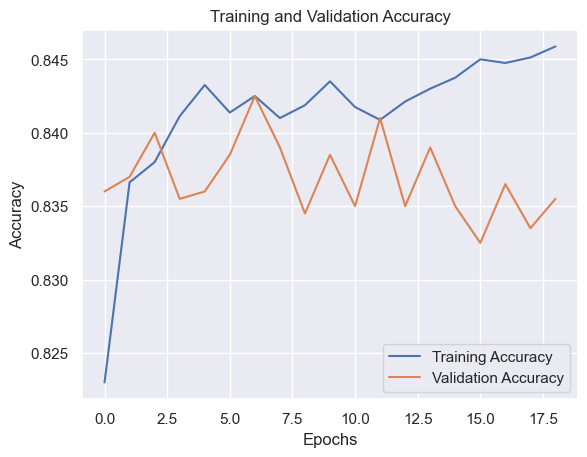

In [92]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()